# Examen 1 - Portafolios de inversión - O2018. Tipo 3.

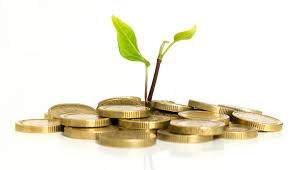

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos primeros módulos.

> El examen consta de dos partes. 
1. La primera es meramente teórica, y los cálculos que puede llegar a involucrar son bastante sencillos. En esta parte, las preguntas son de selección múltiple con justificación, es decir, debes elegir la(s) respuesta(s) correcta(s) y decir porqué la seleccionaste.
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base diaria, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 50% del examen. Cada pregunta tiene un valor del 10%, de los cuales 4% corresponde a la selección y el otro 6% corresponde a la justificación. Si la pregunta corresponde a un cálculo numérico, la justificación es en sí las operaciones resueltas para obtener el resultado en el notebook.

> Segunda parte: tiene un valor del 50% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import scipy.optimize as opt

## I. Primera parte (50%)

**Pregunta 1.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |

¿Cuál es el rendimiento esperado del activo B?

A. 4.00%

B. 5.00%

C. 8.00%

D. 0.50%

La respuesta correcta es (5%): A

In [2]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
tabla = pd.DataFrame({'Prob':[.50, .30, .20], 'A': [.10, .20, -.15], 'B': [.03, .15, -.10], 'C': [.08, -.13, .02]})
tabla

,Prob,A,B,C
0,0.5,0.10,0.03,0.08
1,0.3,0.20,0.15,-0.13
2,0.2,-0.15,-0.10,0.02


In [3]:
ErA = (tabla['Prob'] * tabla['A']).sum()
ErB = (tabla['Prob'] * tabla['B']).sum()
ErC = (tabla['Prob'] * tabla['C']).sum()
ErB

0.039999999999999994

**Pregunta 2.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |

¿Cuál es la volatilidad del activo C?

A. 9.12%

B. 12.29%

C. 6.63%

D. 8.72%

La respuesta correcta es (5%): A

In [4]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
sA = (tabla['Prob'] * (tabla['A'] - ErA)**2).sum()**0.5
sB = (tabla['Prob'] * (tabla['B'] - ErB)**2).sum()**0.5
sC = (tabla['Prob'] * (tabla['C'] - ErC)**2).sum()**0.5
sC

0.09124143795447329

**Pregunta 3.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |


¿Cuál es la el rendimiento esperado y la volatilidad de un portafolio compuesto 30% por el activo A, 40% por el activo B y 30% por el activo C?

A. $E[r_P]$ = 5.41%, $\sigma_P$ = 6.60%

B. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.60%

C. $E[r_P]$ = 4.51%, $\sigma_P$ = 6.06%

D. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.06%

La respuesta correcta es (5%): D

In [5]:
sAB = (tabla['Prob'] * (tabla['A'] - ErA) * (tabla['B'] - ErB)).sum()
sAC = (tabla['Prob'] * (tabla['A'] - ErA) * (tabla['C'] - ErC)).sum()
sBC = (tabla['Prob'] * (tabla['B'] - ErB) * (tabla['C'] - ErC)).sum()

In [6]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
ErP = 0.3 * ErA + 0.4 * ErB + 0.3 * ErC
cov = np.array([[sA**2, sAB, sAC],
               [sAB, sB**2, sBC],
               [sAC, sBC, sC**2]])
w = np.array([0.3, 0.4, 0.3])
sP = (w.T.dot(cov).dot(w))**0.5
ErP, sP

(0.041499999999999995, 0.060599092402444446)

**Pregunta 4.** ¿Cuáles de los siguientes son ejemplos de riesgo de mercado (sistemático)?


Seleccione todas las que apliquen.

A. Recesión económica de EEUU.

B. AMLO no logra vender el avión presidencial.

C. Tercera guerra mundial.

D. Cierta plaga ataca al aguacate Hass, disminuyendo su existencia a números muy bajos.

La respuesta correcta es (5%): A y C

Justificación (5%): Estas dos opciones involucran al mundo, en caso de una tercer guerra mundial la economía en general entraría en riesgo, por otra parte, recesión económica en EEUU todos sabemos que muchos países tienen conexión con esta economía, hay países que dependen de esta.

**Pregunta 5.** Suponga que usted está considerando añadir bienes inmuebles a su portafolio bien diversificado que solo consta de activos, bonos y efectivo en una cuenta bancaria. ¿Cuál característica de los rendimientos de los bienes inmuebles afectaría el riesgo de su portafolio?

A. Rendimientos esperados de los bienes inmuebles.

B. Qué tan viejos son los bienes inmuebles.

C. La correlación de los rendimientos de los bienes inmuebles con las otras clases de activos en su portafolio.

D. La desviación estándar de los rendimientos de los bienes inmuebles.

La respuesta correcta es (5%): C

Justificación (5%): La correlación es la medida que usamos para ver semejanza, el parecido que tengan los activos afectaría.

___
## II. Segunda parte (50%)

**Punto 1 (15%).** En los archivos `datamx.csv` y `dataus.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Grupo Aeroportuario del Pacífico y Herdez, y Microsoft, Apple, Coca-Cola y Nike, respectivamente, desde inicios del 2012 hasta el úlimo mes reportado.

1. Importar los **precios de mensuales** de las compañías <font color=red>americanas</font> en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 
2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

3. De acuerdo a lo obtenido en el punto anterior, elija el par de activos que le ofrezca **la mejor oportunidad para diversificar**. Con estos activos seguirá trabajando en el resto del examen. **Escriba claramente qué activos seleccionó en una celda tipo markdown** (5%).

In [86]:
datos = pd.read_csv('dataus.csv', index_col = 'Date')
datos.head()

,AAPL,MSFT,KO,NKE
Date,,,,
2012-01-01,56.910862,24.440378,26.530993,23.635225
2012-02-01,67.627808,26.269470,27.446392,24.528452
2012-03-01,74.747902,26.875616,29.076834,24.646637
2012-04-01,72.806702,26.675678,30.203966,25.511318
2012-05-01,72.027489,24.318024,29.574728,24.669842


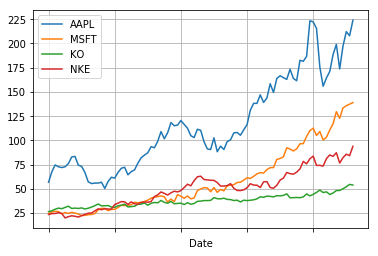

In [87]:
datos.plot(grid=True)

In [88]:
datos.shift().head()

,AAPL,MSFT,KO,NKE
Date,,,,
2012-01-01,NaN,NaN,NaN,NaN
2012-02-01,56.910862,24.440378,26.530993,23.635225
2012-03-01,67.627808,26.269470,27.446392,24.528452
2012-04-01,74.747902,26.875616,29.076834,24.646637
2012-05-01,72.806702,26.675678,30.203966,25.511318


In [89]:
ret = ((datos-datos.shift())/datos.shift()).dropna()
ret.head()

,AAPL,MSFT,KO,NKE
Date,,,,
2012-02-01,0.188311,0.074839,0.034503,0.037792
2012-03-01,0.105284,0.023074,0.059405,0.004818
2012-04-01,-0.025970,-0.007439,0.038764,0.035083
2012-05-01,-0.010702,-0.088382,-0.020833,-0.032984
2012-06-01,0.010853,0.054838,0.046300,-0.185876


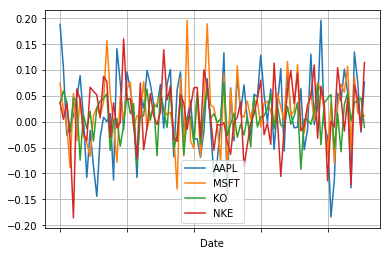

In [90]:
ret.plot(grid=True)

In [91]:
ret.mean()

AAPL    0.017811
MSFT    0.020692
KO      0.008505
NKE     0.016839
dtype: float64

In [92]:
ret.std()

AAPL    0.075301
MSFT    0.057852
KO      0.038600
NKE     0.058976
dtype: float64

In [93]:
# Matriz de covarianza
cov = ret.cov()
cov

,AAPL,MSFT,KO,NKE
AAPL,0.005670,0.001608,0.000560,0.000788
MSFT,0.001608,0.003347,0.000754,0.000686
KO,0.000560,0.000754,0.001490,0.000254
NKE,0.000788,0.000686,0.000254,0.003478


In [94]:
# Matriz de correlación
corr = ret.corr()
corr

,AAPL,MSFT,KO,NKE
AAPL,1.000000,0.369214,0.192702,0.177371
MSFT,0.369214,1.000000,0.337857,0.201156
KO,0.192702,0.337857,1.000000,0.111760
NKE,0.177371,0.201156,0.111760,1.000000


# Se utilizará KO y NIKE

**Punto 2 (15%).** Usando los datos que obtuvo para los **activos que seleccionó** en el punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los activos que **seleccionó en el primer punto**. Reportar los **rendimientos esperados y las volatilidades de estos portafolios (base mensual) en un DataFrame** (8%).

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (7%).

In [98]:
ret1 = ret1[['KO', 'NKE']]
ret1.head()

,KO,NKE
Date,,
2012-02-01,0.034503,0.037792
2012-03-01,0.059405,0.004818
2012-04-01,0.038764,0.035083
2012-05-01,-0.020833,-0.032984
2012-06-01,0.046300,-0.185876


In [99]:
ret_summ = pd.DataFrame(data={'Mean':ret1.mean(),'Volatility':ret1.std()}, index=ret1.columns)
ret_summ

,Mean,Volatility
KO,0.008505,0.038600
NKE,0.016839,0.058976


In [100]:
ret_summ = pd.DataFrame(columns=['KO', 'NKE'], index=['Media', 'Volatilidad'])
ret_summ.loc['Media'] = np.array([0.008505, 0.016839])
ret_summ.loc['Volatilidad'] = np.array([0.038600, 0.058976])
ret_summ.round(4)

,KO,NKE
Media,0.008505,0.016839
Volatilidad,0.0386,0.058976


In [101]:
# Vector de w variando entre 0 y 1 con n pasos
n = 100
w = np.linspace(0, 1, n)
# Rendimientos esperados individuales
E1 = ret_summ.loc['Media', 'KO']
E2 = ret_summ.loc['Media', 'NKE']
# Volatilidades individuales
s1 = ret_summ.loc['Volatilidad', 'KO']
s2 = ret_summ.loc['Volatilidad', 'NKE']
# Correlacion
r12 = corr.loc['KO', 'NKE']

In [135]:
# Crear un DataFrame cuyas columnas sean rendimiento y volatilidad del portafolio para cada una de las w generadas
portafolios = pd.DataFrame(data={'w':w, 'Media': w * E1 + (1 - w) * E2, 
                                'Volatilidad': ((w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * s1 * s2 * r12)**0.5})
portafolios.head()

,w,Media,Volatilidad
0,0.000000,0.016839,0.058976
1,0.010101,0.016755,0.058425
2,0.020202,0.016671,0.057877
3,0.030303,0.016586,0.057331
4,0.040404,0.016502,0.056789


In [104]:
w_minvar = (s2**2 - s1 * s2 * r12) / (s1**2 + s2**2 - 2 * s1 * s2 * r12)
w_minvar

0.7229286699181546

In [105]:
# Función objetivo
def varianza2(w, s1, s2, r12):
    return (w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * s1 * s2 * r12

In [106]:
# Punto inicial
w0 = 0.5
bounds_w = (0, 1)

In [109]:
minvar = opt.minimize(fun=varianza2, x0=w0, args=(s1, s2, r12), bounds=(bounds_w,))
minvar

      fun: array([0.00114763])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.36609474e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.72292882])

In [111]:
# Peso del portafolio de minima varianza
w_minvar2 = minvar.x
w_minvar2, w_minvar

(array([0.72292882]), 0.7229286699181546)

In [112]:
# Rendimiento esperado y volatilidad del portafolio de mínima varianza
E_minvar = w_minvar * E1 + (1 - w_minvar) * E2
s_minvar = (minvar.fun)**0.5
E_minvar, s_minvar

(0.0108141124649021, array([0.03387664]))

**Punto 3 (10%).** En este punto se usarán los mismos **activos que seleccionó** en el punto 1 con sus rendimientos esperados y volatilidades, solo que **el coeficiente de correlación entre sus rendimientos se supondrá de 0.5**.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos **con el nuevo supuesto de correlación**. Reportar **los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame** (5%).
2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (5%).

In [113]:
n1 = 100
w1 = np.linspace(0, 1, n)
# Rendimientos esperados individuales
E_1 = ret_summ.loc['Media', 'KO']
E_2 = ret_summ.loc['Media', 'NKE']
# Volatilidades individuales
s_1 = ret_summ.loc['Volatilidad', 'KO']
s_2 = ret_summ.loc['Volatilidad', 'NKE']
# Correlacion
r_12 = .5

In [133]:
portafolios1 = pd.DataFrame(data={'w':w1, 'Media': w1 * E_1 + (1 - w1) * E_2, 
                                'Volatilidad': ((w1 * s_1)**2 + ((1 - w1) * s_2)**2 + 2 * w1 * (1 - w1) * s_1 * s_2 * r_12)**0.5})
portafolios1.head()

,w,Media,Volatilidad
0,0.000000,0.016839,0.058976
1,0.010101,0.016755,0.058576
2,0.020202,0.016671,0.058178
3,0.030303,0.016586,0.057783
4,0.040404,0.016502,0.057389


In [115]:
w_minvar1 = (s_2**2 - s_1 * s_2 * r_12) / (s_1**2 + s_2**2 - 2 * s_1 * s_2 * r_12)
w_minvar1

0.8693282745611451

In [116]:
def varianza_2(w1, s_1, s_2, r_12):
    return (w1 * s_1)**2 + ((1 - w1) * s_2)**2 + 2 * w1 * (1 - w1) * s_1 * s_2 * r_12

In [117]:
w_0 = 0.5
bounds_w1 = (0, 1)

In [118]:
minvar1 = opt.minimize(fun=varianza_2, x0=w_0, args=(s_1, s_2, r_12), bounds=(bounds_w1,))
minvar1

      fun: array([0.001444])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.39932682e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.86932927])

In [119]:
# Peso del portafolio de minima varianza
w_minvar3 = minvar.x
w_minvar3, w_minvar1

(array([0.72292882]), 0.8693282745611451)

In [120]:
# Rendimiento esperado y volatilidad del portafolio de mínima varianza
E_minvar1 = w_minvar1 * E_1 + (1 - w_minvar1) * E_2
s_minvar1 = (minvar1.fun)**0.5
E_minvar1, s_minvar1

(0.009594018159807417, array([0.038]))

**Punto 4 (10%).** 

1. Usando sus respuestas para los puntos 2 y 3, **grafique las dos fronteras encontradas en una sola gráfica**, además de los puntos correspondientes a los activos individuales, y de **los portafolios de mínima varianza para cada caso**, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (5%).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, **¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?**, **¿cómo puede explicar esta diferencia/similitud?** (5%).

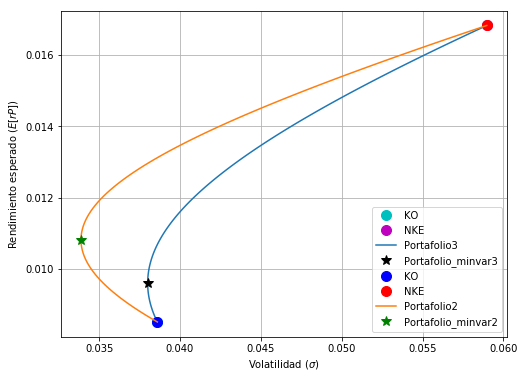

In [130]:
plt.figure(figsize=(8,6))

plt.plot(s_1, E_1, 'oc', ms=10, label='KO')
plt.plot(s_2, E_2, 'om', ms=10, label='NKE')
plt.plot(portafolios1['Volatilidad'], portafolios1['Media'], label='Portafolio3')
plt.plot(s_minvar1, E_minvar1, 'k*', ms=10, label='Portafolio_minvar3')

plt.plot(s1, E1, 'ob', ms=10, label='KO')
plt.plot(s2, E2, 'or', ms=10, label='NKE')
plt.plot(portafolios['Volatilidad'], portafolios['Media'], label='Portafolio2')
plt.plot(s_minvar, E_minvar, 'g*', ms=10, label='Portafolio_minvar2')

plt.grid()
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[rP]$)')
plt.legend(loc='best')

Como podemos ver, es muy notoria la diferencia que se tiene en las dos fronteras, teniendo una correlación de 0.5 la frontera de mínima varianza esta más a la derecha, por otra parte, teniendo una correlación de 0.1117 la frontera de mínima varianza esta más a la izquierda. 

Esto lo podemos explicar con que teniendo correlaciones bajas, significa mayor oportunidad para diversificar.

En este caso el portafolio con mayor diversificación es el primero, vemos que por un menor riesgo podemos adquirir el mismo rendimiento, esto gracias a que la correlación que hay entre los dos activos es menor en este caso.

Al tener mayor correlación entre dos activos el portafolio de mínima varianza se recorre a la derecha ya que la volatilidad aumenta, entonces, el rendimiento no varia pero el riesgo aumenta.

Entonces, se obtiene más diversificación de el portafolio 2 que es el que tiene menor correlación.

El primer portafolio tiene una w de 0.707071, una media de	0.010946 y una volatilidad de 0.033893, con respecto al segundo portafolio con una w de 	0.707071, una media de	0.010946 y una volatilidad de	0.038921.

El cambio que hay es notorio al comparar los dos portafolios.

Se diferencian por el cambio en la volatilidad y en el rendimiento.

Esta diferencia es causada por la distinta correlación entre los dos portafolios.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>